In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("crimedataset.csv",na_values='?')

In [3]:
df.dtypes

communityname           object
state                   object
countyCode             float64
communityCode          float64
fold                     int64
                        ...   
autoTheftPerPop        float64
arsons                 float64
arsonsPerPop           float64
ViolentCrimesPerPop    float64
nonViolPerPop          float64
Length: 147, dtype: object

In [4]:
df = df.replace('?', np.nan)
feat_miss = df.columns[df.isnull().any()]

In [5]:
print(feat_miss)

Index(['countyCode', 'communityCode', 'OtherPerCap', 'LemasSwornFT',
       'LemasSwFTPerPop', 'LemasSwFTFieldOps', 'LemasSwFTFieldPerPop',
       'LemasTotalReq', 'LemasTotReqPerPop', 'PolicReqPerOffic', 'PolicPerPop',
       'RacialMatchCommPol', 'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp',
       'PctPolicAsian', 'PctPolicMinor', 'OfficAssgnDrugUnits',
       'NumKindsDrugsSeiz', 'PolicAveOTWorked', 'PolicCars', 'PolicOperBudg',
       'LemasPctPolicOnPatr', 'LemasGangUnitDeploy', 'PolicBudgPerPop',
       'rapes', 'rapesPerPop', 'robberies', 'robbbPerPop', 'assaults',
       'assaultPerPop', 'burglaries', 'burglPerPop', 'larcenies', 'larcPerPop',
       'autoTheft', 'autoTheftPerPop', 'arsons', 'arsonsPerPop',
       'ViolentCrimesPerPop', 'nonViolPerPop'],
      dtype='object')


In [6]:
df[feat_miss[21:40]].describe()

,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,PolicBudgPerPop,rapes,rapesPerPop,robberies,robbbPerPop,assaults,assaultPerPop,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop
count,3.430000e+02,343.000000,343.000000,3.430000e+02,2007.000000,2007.00000,2214.000000,2214.000000,2202.000000,2202.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2124.000000,2124.000000,1994.000000
mean,3.217602e+07,87.130933,4.285714,1.535779e+05,28.046338,36.25848,237.952123,162.612597,326.528156,378.004605,761.236890,1033.430203,2137.629295,3372.979150,516.692586,473.965628,30.907721,32.153682,589.078922
std,1.104566e+08,10.349612,4.064538,2.030409e+05,105.616135,34.23975,2250.720788,234.486624,1987.947941,438.238599,3111.702756,763.354442,7600.573464,1901.316145,3258.164244,504.666026,180.125248,39.240900,614.784518
min,2.380215e+06,10.850000,0.000000,1.526040e+04,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2.000000,16.920000,10.000000,77.860000,1.000000,6.550000,0.000000,0.000000,0.000000
25%,7.275060e+06,84.295000,0.000000,8.809435e+04,2.000000,11.53500,5.000000,27.647500,18.000000,94.187500,95.000000,511.690000,392.000000,2040.080000,30.000000,156.952500,1.000000,7.670000,161.700000
50%,1.116411e+07,89.580000,5.000000,1.145820e+05,7.000000,26.92000,19.000000,74.800000,56.000000,226.525000,205.000000,822.715000,747.000000,3079.510000,75.000000,302.355000,5.000000,21.080000,374.060000
75%,2.014754e+07,93.200000,10.000000,1.556557e+05,19.000000,51.47000,70.000000,187.155000,180.000000,504.387500,508.000000,1350.232500,1675.000000,4335.410000,232.500000,589.775000,16.000000,42.852500,794.400000
max,1.617293e+09,99.940000,10.000000,2.422367e+06,2818.000000,401.35000,86001.000000,2264.130000,62778.000000,4932.500000,99207.000000,11881.020000,235132.000000,25910.550000,112464.000000,4968.590000,5119.000000,436.370000,4877.060000


In [7]:
cols_mean = ['OtherPerCap','rapes','rapesPerPop','robberies','robbbPerPop','assaults','assaultPerPop','burglaries','burglPerPop','larcenies','larcPerPop','autoTheft','autoTheftPerPop','arsons','arsonsPerPop']

from sklearn.preprocessing import Imputer

imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)

imputer = imputer.fit(df[cols_mean])
df[cols_mean] = imputer.transform(df[cols_mean])

df.dropna(subset = ["ViolentCrimesPerPop"], inplace=True)
df = df.dropna(axis=1)

C:\Users\Harshvardhan\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [8]:
df.dtypes.value_counts

<bound method IndexOpsMixin.value_counts of communityname           object
state                   object
fold                     int64
population               int64
householdsize          float64
                        ...   
autoTheft              float64
autoTheftPerPop        float64
arsons                 float64
arsonsPerPop           float64
ViolentCrimesPerPop    float64
Length: 122, dtype: object>

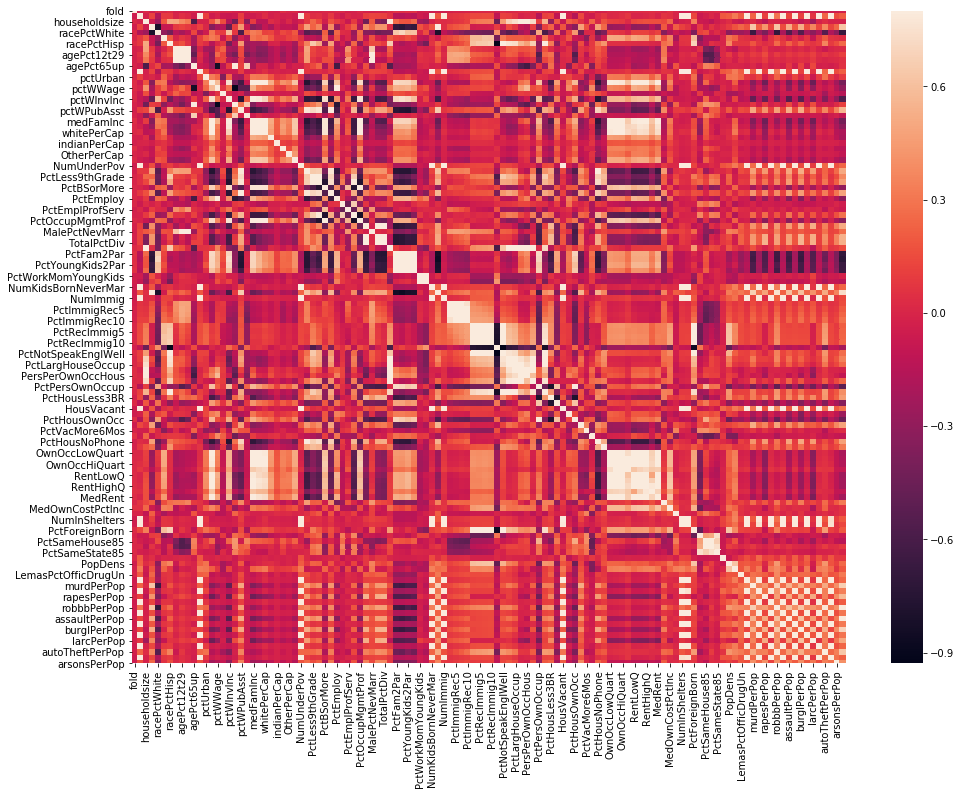

In [9]:
import seaborn as sns

corrmat = df.corr()
fig = plt.figure(figsize = (16, 12))

sns.heatmap(corrmat, vmax = 0.8)
plt.show()

In [10]:
corrT = df.corr(method = 'pearson').round(4)
corrT = corrT.sort_values(by=['ViolentCrimesPerPop'])
corrT['ViolentCrimesPerPop']

PctKids2Par           -0.7281
PctFam2Par            -0.6986
racePctWhite          -0.6768
PctYoungKids2Par      -0.6584
PctTeen2Par           -0.6556
                        ...  
burglPerPop            0.6985
PctKidsBornNeverMar    0.7381
robbbPerPop            0.8286
assaultPerPop          0.9456
ViolentCrimesPerPop    1.0000
Name: ViolentCrimesPerPop, Length: 120, dtype: float64

In [11]:
df = df.drop(['state','communityname','fold'],axis=1)

In [12]:
import numpy as np
from sklearn.decomposition import TruncatedSVD


svd =  TruncatedSVD(n_components = 69)
df_transf = svd.fit_transform(df)

print("Singular values:")
print(svd.singular_values_)

print("Transformed Matrix after reducing to 69 features:")
print(df_transf)

Singular values:
[1.42871081e+07 1.12257626e+07 1.28981647e+06 1.09039836e+06
 8.33907458e+05 6.47661974e+05 3.89228594e+05 3.44869080e+05
 3.29351005e+05 3.14550073e+05 2.48543491e+05 2.00940492e+05
 1.86215663e+05 1.57789684e+05 1.32924777e+05 1.18873540e+05
 8.80146814e+04 8.22099776e+04 6.66030088e+04 5.83594561e+04
 3.79237044e+04 2.81049175e+04 2.20288040e+04 2.00318272e+04
 1.62017888e+04 1.35743171e+04 1.18872207e+04 1.07997965e+04
 9.09864842e+03 6.25089249e+03 5.34390422e+03 5.09805579e+03
 4.66514818e+03 3.17444775e+03 2.54685296e+03 2.04004076e+03
 1.41669279e+03 1.27950244e+03 1.19625502e+03 9.78996317e+02
 8.58728182e+02 8.01279761e+02 7.74880734e+02 7.21168318e+02
 6.68260308e+02 5.50787297e+02 5.15643399e+02 4.87900027e+02
 4.29613675e+02 4.06608563e+02 4.04687152e+02 3.50687405e+02
 3.20943787e+02 2.94419648e+02 2.82348133e+02 2.62407517e+02
 2.43191265e+02 2.27815794e+02 2.15472162e+02 2.11992833e+02
 1.94327085e+02 1.84702524e+02 1.72054629e+02 1.55516761e+02
 1.5050

In [13]:
Y = df['ViolentCrimesPerPop']

In [14]:
X = df.iloc[:,:-1]

In [15]:
X.dtypes

population           int64
householdsize      float64
racepctblack       float64
racePctWhite       float64
racePctAsian       float64
                    ...   
larcPerPop         float64
autoTheft          float64
autoTheftPerPop    float64
arsons             float64
arsonsPerPop       float64
Length: 118, dtype: object